Diberikan dataset sebagai berikut:
https://drive.google.com/file/d/1W_-TeeNbSMCHxGhz6TJfEHFHgnyMiBQk/view?usp=share_link



Tulis Identitas anda:

*   Nim: 20.11.3694
*   Nama: Fathurahman Nur Aziz
*   Kelas: 20-SIIF-07 / 20S1IF-BigData3


1. Lakukan klasifikasi dengan ketentuan sebagai berikut:


*   a. gunakan algoritma naive bayes
*   b. gunakan algoritma random forest





2. Lakukan analisa performa naive bayes dan random forest tersebut

3. Gunakan K-FOLD VALIDATION DENGAN nilai K=10, untuk mengukur performa 2 algoritma tersebut

4. Lakukan analisa, algoritma mana yang paling baik performanya menurut anda, berikan penjelasannya

#JAWABAN :

##1. Import Library

In [45]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

##2. Load Dataset

In [46]:
#load dataset
url = 'https://raw.githubusercontent.com/azizfath/bddm3/main/tugas10/IRIS.csv'

df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##3. Encoding

In [47]:
#cek data unik dari kolom species
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
#melakukan mapping untuk kolom spesies
num_species= {
    'Iris-setosa':0, 
    'Iris-versicolor':1,
    'Iris-virginica':2
}

#encoding dengan map di atas
#kemudian letakan di dataframe baru
df_encoded = df.copy()
df_encoded['species'] = df_encoded['species'].map(num_species)

In [49]:
#melihat ulang hasil mapping df sebelumnya
df_encoded

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


###4. Preparing Data for Classification

In [50]:
#mencari korelasi dengan method df.corr()
corr = df_encoded.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [51]:
#mencari korelasi kolom species

corr_species = abs(corr['species'])
#mencari fitur yang relevan
relevant_features = corr_species[corr_species>0.5]
relevant_features

sepal_length    0.782561
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [52]:
#drop kolom yang tidak terpakai
df_encoded.drop(['sepal_width'], axis=1, inplace=True)
df_encoded

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


In [53]:
#X -> independent var
X = df_encoded.iloc[:,[0,1,2]].values

#y -> dependent var
y = df_encoded.iloc[:,-1].values

#menampilkan 10 nilai awal X dan y
print(f'X: \n {X[:10]}')
print(f'y: \n {y[:10]}')

X: 
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]]
y: 
 [0 0 0 0 0 0 0 0 0 0]


In [54]:
#split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=21)

In [55]:
#print bentuk dari hasil data split
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (97, 3)
X_test shape:  (53, 3)
y_train shape:  (97,)
y_test shape:  (53,)


###5. Naive Bayes Classification

In [56]:
#membuat model klasifikasi dengan Gaussian Naive Bayes

classifierNB = GaussianNB()
classifierNB.fit(X_train,y_train)

GaussianNB()

In [57]:
#melakukan prediksi

NB_pred = classifierNB.predict(X_test)

In [58]:
#menampilkan hasil prediksi 15 kolom pertama
print('index \t species');
for i,y in enumerate(NB_pred[:15]):
  print(f'{i} \t {y}')

index 	 species
0 	 1
1 	 0
2 	 0
3 	 0
4 	 1
5 	 1
6 	 0
7 	 2
8 	 0
9 	 0
10 	 1
11 	 1
12 	 2
13 	 2
14 	 0


In [59]:
#melihat probabilitas dari 15 data awal X test

classifierNB.predict_proba(X_test[:15])

array([[5.80434481e-075, 9.99974021e-001, 2.59793541e-005],
       [1.00000000e+000, 8.14111208e-011, 1.35809458e-019],
       [1.00000000e+000, 6.69363782e-018, 2.67514515e-026],
       [1.00000000e+000, 2.55558322e-014, 7.75658843e-024],
       [6.28309525e-084, 9.99938956e-001, 6.10437948e-005],
       [1.68516791e-105, 9.87581042e-001, 1.24189581e-002],
       [1.00000000e+000, 8.90180084e-016, 1.88389378e-023],
       [5.23871444e-162, 2.67286786e-003, 9.97327132e-001],
       [1.00000000e+000, 8.15651624e-014, 3.09763349e-023],
       [1.00000000e+000, 3.68625037e-016, 4.00661830e-025],
       [3.49287118e-054, 9.99998835e-001, 1.16514313e-006],
       [6.41367518e-083, 9.99944307e-001, 5.56925450e-005],
       [1.72531613e-259, 5.18133392e-011, 1.00000000e+000],
       [0.00000000e+000, 1.52237415e-013, 1.00000000e+000],
       [1.00000000e+000, 8.39656087e-011, 2.05780902e-020]])

###6. Random Forest Classification

In [60]:
#create binary classifier with RFC
classifierRFC = RandomForestClassifier()
classifierRFC.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
#predict
RFC_pred = classifierRFC.predict(X_test)

In [62]:
#menampilkan hasil prediksi 15 kolom pertama
print('index \t species');
for i,y in enumerate(RFC_pred[:15]):
  print(f'{i} \t {y}')

index 	 species
0 	 1
1 	 0
2 	 0
3 	 0
4 	 1
5 	 1
6 	 0
7 	 2
8 	 0
9 	 0
10 	 1
11 	 1
12 	 2
13 	 2
14 	 0


###7. Analisis Performa Naive Bayes Classification dan Random Forest Classification

In [63]:
#menampilkan classification report untuk Naive Bayes Classification
print('-------------------------------------------------------')
print('Classification Report for Naive Bayes Classification')
print('-------------------------------------------------------')
print(classification_report(y_test,NB_pred,zero_division=0))

#menampilkan classification report untuk Random Forest Classification
print('-------------------------------------------------------')
print('Classification Report for Random Forest Classification')
print('-------------------------------------------------------')
print(classification_report(y_test,RFC_pred,zero_division=0))

-------------------------------------------------------
Classification Report for Naive Bayes Classification
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.79      0.88        19
           2       0.79      1.00      0.88        15

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.92        53
weighted avg       0.94      0.92      0.92        53

-------------------------------------------------------
Classification Report for Random Forest Classification
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.84      0.91        19
           2       0.83      1.00      0.91        15

    accuracy                           0.94        53
   macro avg   

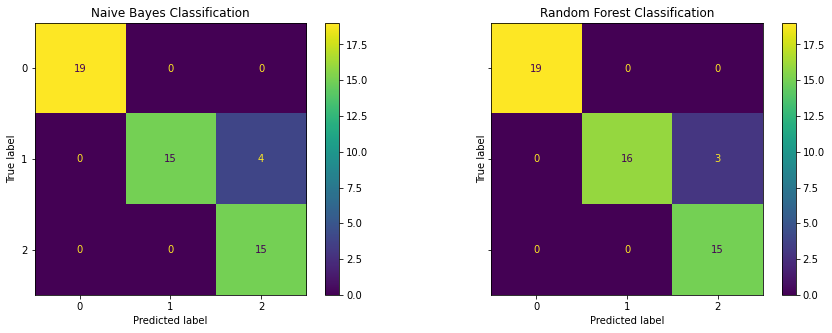

In [64]:
#menampilkan confussion matrix antara Naive Bayes dan RFC
f, axes = plt.subplots(1,2,figsize=(15,5),sharey='row')

classifier = {
    "Naive Bayes Classification": NB_pred,
    "Random Forest Classification": RFC_pred
}

for i,(key,val) in enumerate(classifier.items()):
    cm = confusion_matrix(y_test,val)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(key)
    
plt.show()

###8. K-Fold Cross Validation (k=10)

In [65]:
#K-Fold Cross Validation untuk Naive Bayes
scoreNB = cross_validate(classifierNB, X_test, y_test, cv=10)

df_scoreNB = pd.DataFrame(scoreNB)
print(df_scoreNB)
print(f'\nAverage :\n{df_scoreNB.mean()}')

   fit_time  score_time  test_score
0  0.001083    0.000517    1.000000
1  0.000927    0.000464    1.000000
2  0.000897    0.000478    0.833333
3  0.000880    0.000418    1.000000
4  0.000845    0.000452    1.000000
5  0.000866    0.000463    0.800000
6  0.000542    0.000323    0.800000
7  0.000481    0.000304    1.000000
8  0.000476    0.000244    1.000000
9  0.000474    0.000247    1.000000

Average :
fit_time      0.000747
score_time    0.000391
test_score    0.943333
dtype: float64


In [66]:
#K-Fold Cross Validation untuk Random Forest Classification
scoreNB = cross_validate(classifierRFC, X_test, y_test, cv=10)

df_scoreNB = pd.DataFrame(scoreNB)
print(df_scoreNB)
print(f'\nAverage :\n{df_scoreNB.mean()}')

   fit_time  score_time  test_score
0  0.095517    0.008511    1.000000
1  0.085807    0.007917    0.833333
2  0.090326    0.008325    0.833333
3  0.087605    0.007863    1.000000
4  0.100418    0.008943    1.000000
5  0.097051    0.011758    1.000000
6  0.089544    0.008049    0.800000
7  0.102926    0.008208    1.000000
8  0.095319    0.008022    1.000000
9  0.088195    0.013349    1.000000

Average :
fit_time      0.093271
score_time    0.009095
test_score    0.946667
dtype: float64


#KESIMPULAN

##Berdasarkan 2 test diatas, diperoleh bahwa :
1. Rata-rata Fit Time Naive Bayes jauh lebih kecil (lebih cepat) daripada Random Forest Classification
2. Rata-rata Score Time Naive Bayes jauh lebih kecil (lebih cepat) daripada Random Forest Classification
3. Rata-rata test Score Naive Bayes jauh lebih besar (lebih akurat) daripada Random Forest Classfication

Maka dapat disimpulkan bahwa :
* Performa Naive Bayes lebih bagus jika dillihat dari poin 1 & 2
* Akurasi dari Klasifikasi Naive Bayes juga lebih baik jika dilihat dari poin 3

###**Jadi Algoritma yang lebih baik adalah Naive Bayes Classification**